# Module 5 - Modern Portfolio Theory

   ### Welcome to the Answer notebook for Module 5 ! 
Make sure that you've submitted the module 4 notebook and unlocked Module 5 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 5.1 
For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [1]:
import pandas as pd
import numpy as np
mind=pd.read_csv('mindtree_bollinger.csv')
mind['Date']=mind['Date'].astype('datetime64[ns]')
mind.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Per_Change,Trend,upper band,lower band,middle band
0,2017-05-15,MINDTREE,EQ,510.60,507.35,515.00,505.90,510.50,509.45,510.39,...,100362,36.90,2017,5,509.450000,0.000000,Slight or No change,NaN,NaN,NaN
1,2017-05-16,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,...,82090,39.65,2017,5,510.249582,0.363137,Slight or No change,NaN,NaN,NaN
2,2017-05-17,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,...,150098,38.35,2017,5,508.495948,-0.968120,Slight negative,NaN,NaN,NaN
3,2017-05-18,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,...,170919,20.05,2017,5,500.779579,-2.656265,Negative,NaN,NaN,NaN
4,2017-05-19,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,...,57853,16.42,2017,5,500.222798,0.933252,Slight positive,NaN,NaN,NaN


In [2]:
d_mean=(mind['Close Price'].pct_change()*100).mean()
d_std=(mind['Close Price'].pct_change()*100).std()
print('Mean Daily return {} \nStandard Deviation Daily return {} \nMean Annual Return {} \nVolatility (Annual Standard Deviation) {}'.format(d_mean,d_std,d_mean*252,d_std*(252**(1/2))))

Mean Daily return 0.15578165636875002 
Standard Deviation Daily return 2.151154178820467 
Mean Annual Return 39.256977404925 
Volatility (Annual Standard Deviation) 34.14851393349794


### Query 5.2
Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [3]:
mart=pd.read_csv('MARUTI.csv')
mart['Date']=mart['Date'].astype('datetime64[ns]')
mart.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01
1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97
2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37
3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44
4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49


In [4]:
rl=pd.read_csv('RELIANCE.csv')
rl['Date']=rl['Date'].astype('datetime64[ns]')
rl.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
3,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
4,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32


In [5]:
mint=pd.read_csv('MINDTREE.csv')
mint['Date']=mint['Date'].astype('datetime64[ns]')
mint.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MINDTREE,EQ,2017-05-15,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,1.388005e+08,8261,100362,36.90
1,MINDTREE,EQ,2017-05-16,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,1.061317e+08,5550,82090,39.65
2,MINDTREE,EQ,2017-05-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,2.004375e+08,13341,150098,38.35
3,MINDTREE,EQ,2017-05-18,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,4.309377e+08,18513,170919,20.05
4,MINDTREE,EQ,2017-05-19,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,1.748782e+08,8326,57853,16.42


In [6]:
ttp=pd.read_csv('TATAPOWER.csv')
ttp['Date']=ttp['Date'].astype('datetime64[ns]')
ttp.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TATAPOWER,EQ,2017-05-15,82.30,82.55,83.80,82.15,83.55,83.55,82.85,2007841,1.663515e+08,13315,796744,39.68
1,TATAPOWER,EQ,2017-05-16,83.55,83.90,85.95,83.40,83.70,83.85,84.20,5141578,4.329310e+08,23193,2125318,41.34
2,TATAPOWER,EQ,2017-05-17,83.85,84.00,86.00,83.60,85.15,85.35,84.92,5499293,4.669814e+08,32097,2264851,41.18
3,TATAPOWER,EQ,2017-05-18,85.35,84.75,85.60,83.50,83.80,83.75,84.49,2296399,1.940177e+08,6983,1217618,53.02
4,TATAPOWER,EQ,2017-05-19,83.75,84.40,85.45,83.05,83.90,84.15,84.03,6222693,5.229199e+08,19269,1918659,30.83


In [7]:
jet=pd.read_csv('JETAIRWAYS.csv')
jet['Date']=jet['Date'].astype('datetime64[ns]')
jet.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,JETAIRWAYS,EQ,2017-05-15,519.45,520.00,533.40,517.10,527.8,527.50,526.08,1837033,9.664298e+08,25433,430754,23.45
1,JETAIRWAYS,EQ,2017-05-16,527.50,527.00,536.50,524.65,534.0,534.15,531.79,1382182,7.350363e+08,23991,284837,20.61
2,JETAIRWAYS,EQ,2017-05-17,534.15,532.00,534.75,526.20,530.0,528.90,529.75,690466,3.657742e+08,10219,53551,7.76
3,JETAIRWAYS,EQ,2017-05-18,528.90,525.15,538.60,517.50,517.7,522.70,529.55,1701102,9.008102e+08,25651,309608,18.20
4,JETAIRWAYS,EQ,2017-05-19,522.70,525.60,532.90,517.45,521.0,520.40,524.69,1272799,6.678247e+08,20409,257037,20.19


In [8]:
total = len(mint) + len(jet) + len(rl) + len(mart) + len(ttp)
def weight(stock):
    return (len(stock)/total)

In [9]:
# checking weight
print('Mindtree wieght ',round(weight(mint),3))
print('Jetairways wieght ',round(weight(jet),3))
print('Reliance wieght ',round(weight(rl),3))
print('Maruti wieght ',round(weight(mart),3))
print('Tatapower wieght ',round(weight(ttp),3))

Mindtree wieght  0.2
Jetairways wieght  0.2
Reliance wieght  0.2
Maruti wieght  0.2
Tatapower wieght  0.2


In [10]:
# Annual Return mean
def mean_annual(stock):
    mean=((stock['Close Price'].pct_change()*100).mean())*252
    return(mean)
print('Mindtree Mean Annual Return ',mean_annual(mint))
print('Jetairways Mean Annual Return ',mean_annual(jet))
print('Reliance Mean Annual Return ',mean_annual(rl))
print('Maruti Mean Annual Return ',mean_annual(mart))
print('Tatapower Mean Annual Return ',mean_annual(ttp))

Mindtree Mean Annual Return  39.256977404925
Jetairways Mean Annual Return  -48.10188004468461
Reliance Mean Annual Return  8.714096778575362
Maruti Mean Annual Return  0.39208403162146815
Tatapower Mean Annual Return  -10.036039648685538


In [11]:
# Volatility
def std_annual(stock):
    std=((stock['Close Price'].pct_change()*100).std())*(252**(1/2))
    return(std)
print('Mindtree Volatility ',std_annual(mint))
print('Jetairways Volatility ',std_annual(jet))
print('Reliance Volatility ',std_annual(rl))
print('Maruti Volatility ',std_annual(mart))
print('Tatapower Volatility ',std_annual(ttp))

Mindtree Volatility  34.14851393349794
Jetairways Volatility  62.485368285741195
Reliance Volatility  43.8787570524256
Maruti Volatility  22.50024940322801
Tatapower Volatility  30.826564980318754


In [12]:
df=pd.DataFrame()
df['Mindtree']=(mint['Close Price'].pct_change())*100
df['Reliance']=(rl['Close Price'].pct_change())*100
df['Maruti']=(mart['Close Price'].pct_change())*100
df['JetAirways']=(jet['Close Price'].pct_change())*100
df['TataPower']=(ttp['Close Price'].pct_change())*100
df.head()

,Mindtree,Reliance,Maruti,JetAirways,TataPower
0,NaN,NaN,NaN,NaN,NaN
1,0.363137,0.907671,1.905802,1.260664,0.359066
2,-0.968120,-0.235936,0.061116,-0.982870,1.788909
3,-2.656265,-1.903037,-1.827340,-1.172244,-1.874634
4,0.933252,-0.640374,-0.592881,-0.440023,0.477612


In [13]:
# Annual return for portfolio
weight=0.2
annual=0
for i in range(5):
    annual=annual+(df.iloc[: , i].mean()*weight)
annual=annual*252
print('Annual Return of the Portfolio ',annual)

Annual Return of the Portfolio  -1.481654467866423


In [14]:
covar=df.cov()
covar.head()

,Mindtree,Reliance,Maruti,JetAirways,TataPower
Mindtree,4.627464,0.428997,0.352366,0.452164,0.439462
Reliance,0.428997,7.650824,0.269301,0.259098,1.021640
Maruti,0.352366,0.269301,2.013538,0.981718,0.440070
JetAirways,0.452164,0.259098,0.981718,15.493735,1.491166
TataPower,0.439462,1.021640,0.440070,1.491166,3.771702


In [62]:
def stk1(stock,weight):
    val=((weight**2)*((df[stock].std())**2))
    return val
def stk2(stock,share,weight1,weight2):
    res=2*(weight1*weight2*(df[stock].std())*(df[share].std())*(covar[stock][share]))
    return res
var=(stk1('Mindtree',weight)+stk1('Maruti',weight)+stk1('Reliance',weight)+stk1('JetAirways',weight)+stk1('TataPower',weight)+stk2('Mindtree','Maruti',weight,weight)+stk2('Mindtree','Reliance',weight,weight)+stk2('Mindtree','JetAirways',weight,weight)+stk2('Mindtree','TataPower',weight,weight)+stk2('Maruti','Reliance',weight,weight)+stk2('Maruti','JetAirways',weight,weight)+stk2('Maruti','TataPower',weight,weight)+stk2('Reliance','JetAirways',weight,weight)+stk2('Reliance','TataPower',weight,weight)+stk2('JetAirways','TataPower',weight,weight))*252
voltality=np.sqrt(var)
print('Volatility of the Portfolio ',voltality)

Volatility of the Portfolio  32.851464957414436


### Query 5.3
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [65]:
def meanstk (weight):
    an=0
    for i in range(5):
        an=an+(df.iloc[: , i].mean()*weight[i])
    an=an*252
    return an
data=pd.DataFrame(index=range(25000),columns=['volatility','annual','sharp'])
data.head()

,volatility,annual,sharp
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [76]:
for j in range(25000):
    wt = np.random.random(5)
    wt = wt/sum(wt)
    varn=(stk1('Mindtree',wt[0])+stk1('Maruti',wt[1])+stk1('Reliance',wt[2])+stk1('JetAirways',wt[3])+stk1('TataPower',wt[4])+stk2('Mindtree','Maruti',wt[0],wt[1])+stk2('Mindtree','Reliance',wt[0],wt[2])+stk2('Mindtree','JetAirways',wt[0],wt[3])+stk2('Mindtree','TataPower',wt[0],wt[4])+stk2('Maruti','Reliance',wt[1],wt[2])+stk2('Maruti','JetAirways',wt[1],wt[3])+stk2('Maruti','TataPower',wt[1],wt[4])+stk2('Reliance','JetAirways',wt[2],wt[3])+stk2('Reliance','TataPower',wt[2],wt[4])+stk2('JetAirways','TataPower',wt[3],wt[4]))*252
    vol=np.sqrt(varn)
    ann=meanstk(wt)
    shp = ann/vol
    data.volatility.iloc[j]=vol
    data.annual.iloc[j]=ann
    data.sharp.iloc[j]=shp

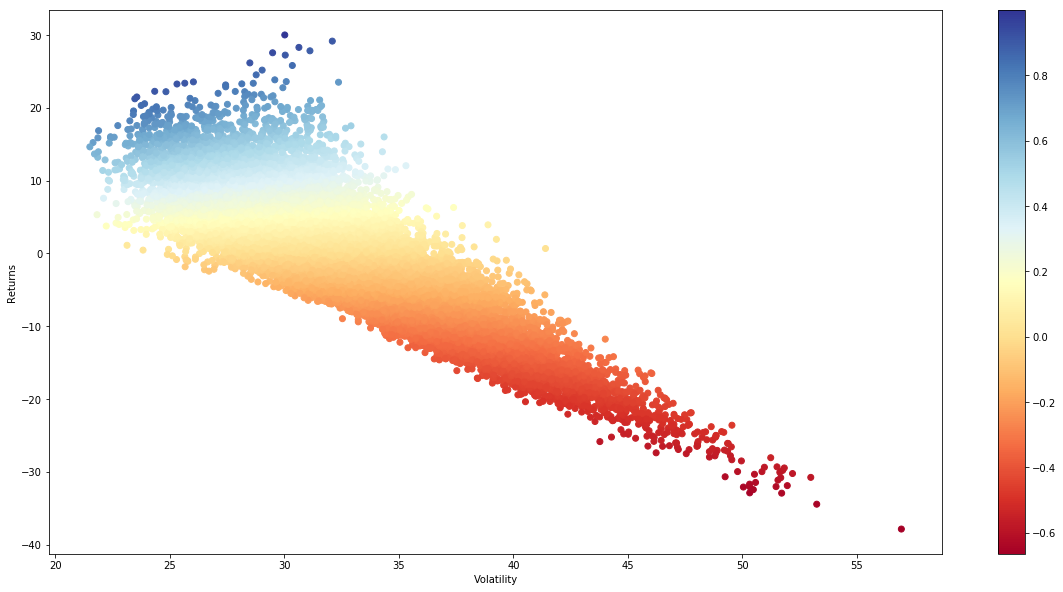

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(data.volatility,data.annual,c=data.sharp,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

### Query 5.4
Mark the 2 portfolios where -
>Portfolio 1 - The Sharpe ratio is the highest

>Portfolio 2 - The volatility is the lowest. 

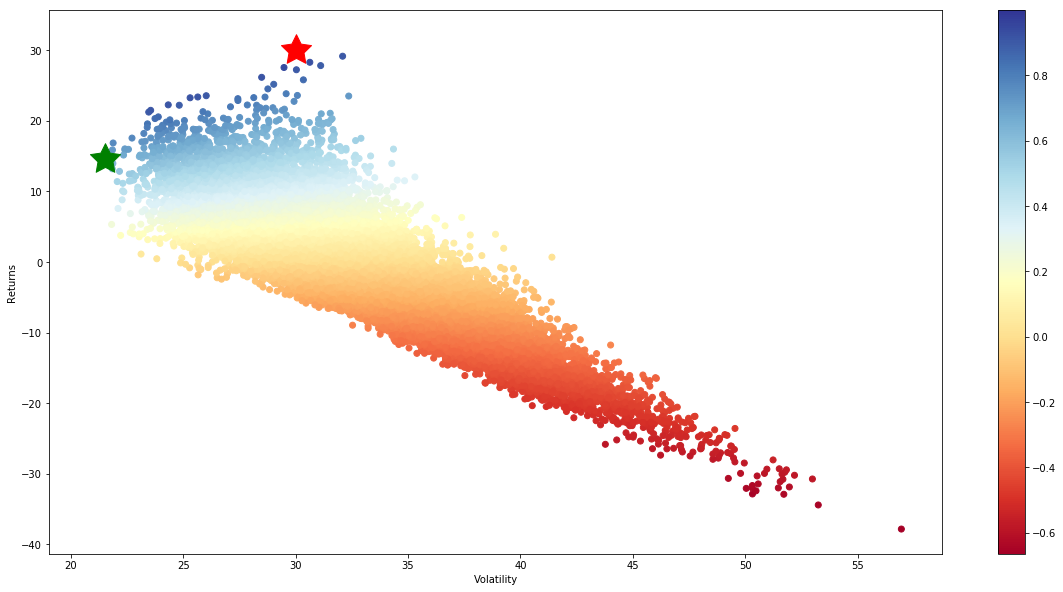

In [78]:
data=data.astype('float64')
maxpt = data.iloc[data['sharp'].idxmax()]
minpt = data.iloc[data['volatility'].idxmin()]

plt.figure(figsize=(20,10))
plt.scatter(data.volatility,data.annual,c=data.sharp,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

plt.scatter(maxpt[0],maxpt[1],marker=(5,1,0),color='r',s=1000)
plt.scatter(minpt[0],minpt[1],marker=(5,1,0),color='g',s=1000)